<a href="https://colab.research.google.com/github/ucchol/Applied-Cognitive-Modeling-CS--5390/blob/main/Make_up_assignment_Asif_Rahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyibl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pyibl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Please develop an Instance-Based Learning Model to capture the interaction between attacker
and defender.
• Two players (attacker and defender) are playing
against each other, and they are aware of each
other’s actions and outcomes (Figure 1 in the
reading).
• First, the attacker makes a choice to attack or notattack a network.
• Next, the defender makes a choice to defend the
network or not.
• Payoff matrix is provided in Figure 2 of the above
reading.
a) Please explain how you developed the model to capture above scenario. The explanation
should include description of agents, attributes, and pre-population process. Please use the
default parameters i.e., decay = 0.50 and noise = 0.25. Please submit your code for review.
-- 40 Points
• Hint: You may store other player’s actions as an attribute or give weight to other
players outcome while calculating blended values.

#Model without Action Attribute

Attacker : Attack, Not-Attack  0.0306 0.9694
Defender : Defend, Not-Defend  0.4457 0.5543


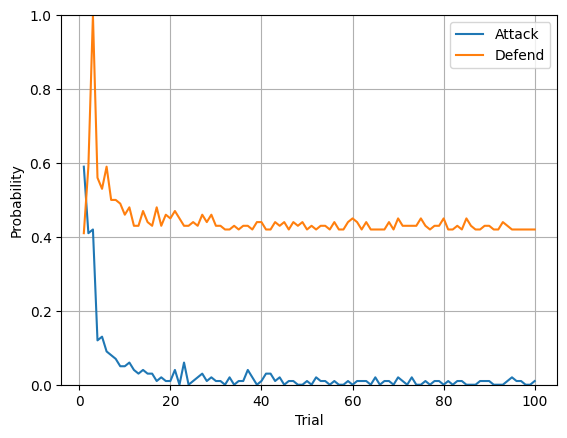

In [37]:
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 100
def reset_agent(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = decay
def run():
    Attacker = pyibl.Agent("Agent1", default_utility= 25, optimized_learning=False)
    Defender = pyibl.Agent("Agent2", default_utility= 25, optimized_learning=False)
    a_a = 0
    a_na = 0
    d_d = 0
    d_nd = 0
    p_a = [0] * TRIALS
    p_d = [0] * TRIALS

    for p in range(PARTICIPANTS):
        total = 0
        reset_agent(Attacker)
        reset_agent(Defender)
        for t in range(TRIALS):
            player1 = Attacker.choose(['Attack', 'Not-Attack'])
            player2 = Defender.choose(['Defend', 'Not-Defend'])
            payoff1 = payoff2 = 0 
            if player1 == 'Attack' and player2 == 'Defend':
                payoff1 = -5 
                payoff2 = 5
                a_a += 1
                d_d += 1
                p_a[t] += 1
                p_d[t] += 1

            elif player1 == 'Attack' and player2 == 'Not-Defend':
                payoff1 = 10 
                payoff2 = -15
                a_a += 1
                d_nd += 1
                p_a[t] += 1

            elif player1 == 'Not-Attack' and player2 == 'Defend':
                payoff1 = 0 
                payoff2 = -5
                a_na += 1
                d_d += 1
                p_d[t] += 1

            else:
                payoff1 = 0 
                payoff2 = 0
                a_na += 1
                d_nd += 1
                            
            Attacker.respond(payoff1)
            Defender.respond(payoff2)
    print('Attacker : Attack, Not-Attack ', a_a / (TRIALS * PARTICIPANTS), a_na / (TRIALS * PARTICIPANTS))   
    print('Defender : Defend, Not-Defend ', d_d / (TRIALS * PARTICIPANTS), d_nd / (TRIALS * PARTICIPANTS))
    return [n / PARTICIPANTS for n in p_a], [n / PARTICIPANTS for n in p_d]

if __name__ == '__main__':
    a, d = run()
    plt.plot(range(1, TRIALS + 1), a, label = 'Attack')
    plt.plot(range(1, TRIALS + 1), d, label = 'Defend')
    plt.ylim([0, 1])
    plt.ylabel("Probability")
    plt.xlabel("Trial")
    plt.legend()
    plt.grid()
    plt.show()

This code simulates a game between an attacker and a defender and tracks the probabilities of attack and defense over multiple trials. It provides insights into the decision-making behavior of the agents and how their strategies evolve over time.

The code starts by defining several constants such as the number of participants, decay rate, noise level, target count, and number of trials.

The reset_agent function is defined to reset the agent's memory and set the noise and decay parameters.

The run function initializes the attacker and defender agents using the pyibl module. It also initializes variables to keep track of various statistics such as the number of successful attacks, successful defenses, and probabilities of attack and defense over trials.

The code then runs a loop over the participants and trials. Within each trial, the attacker and defender make their decisions using the choose method from the pyibl module. The payoff for each decision combination is calculated based on the chosen actions.

Depending on the combination of actions, the payoffs are assigned to each player, and the appropriate statistics and probabilities are updated.

After the loop, the code prints the probabilities of attack and defense for the attacker and defender.

Finally, the code plots the probabilities of attack and defense over the trials using the matplotlib library.

Overall, this code simulates a game between an attacker and a defender and tracks the probabilities of attack and defense over multiple trials. It provides insights into the decision-making behavior of the agents and how their strategies evolve over time.

At the start, the attacker starts to attack, and the defender defends at the fullest. Over the time, the attack starts to lessen, and thats why the defender starts to match the energy of the attacker. Over the 100 trials, the attacker prone to not attcking, and the defender remains the same.

#Modeling with Attribute

Attacker : Attack, Not-Attack  0.0994 0.9006
Defender : Defend, Not-Defend  0.7022 0.2978


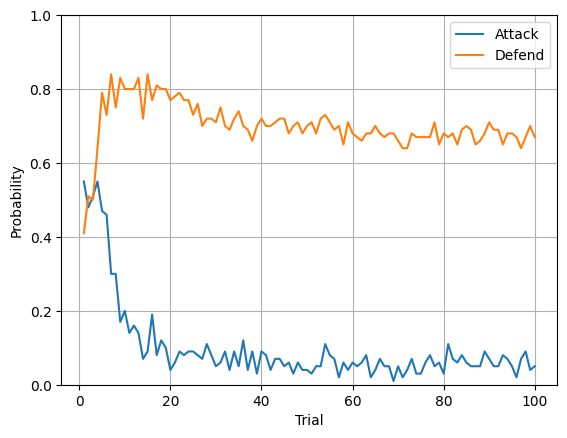

In [28]:
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 100
def reset_agent(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = decay
def run():
    Attacker = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)
    Defender = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)

    a_a = 0
    a_na = 0
    d_d = 0
    d_nd = 0
    
    p_a = [0] * TRIALS
    p_d = [0] * TRIALS
    
    for p in range(PARTICIPANTS):
        total = 0
        reset_agent(Attacker)
        reset_agent(Defender)       
        attribute1 = np.random.choice(['Defend', 'Not-Defend'])
        attribute2 = np.random.choice(['Attack', 'Not-Attack'])
        
        for t in range(TRIALS):
            player1 = Attacker.choose([{'Action':'Attack','attribute1':attribute1},
                                      {'Action':'Not-Attack','attribute1':attribute1}])['Action']
            player2 = Defender.choose([{'Action':'Defend','attribute1':attribute2},
                                      {'Action':'Not-Defend','attribute1':attribute2}])['Action']
            attribute1 = player2
            attribute2 = player1
            payoff1 = payoff2 = 0 
            if player1 == 'Attack' and player2 == 'Defend':
                payoff1 = -5 
                payoff2 = 5
                a_a += 1
                d_d += 1
                p_a[t] += 1
                p_d[t] += 1
            elif player1 == 'Attack' and player2 == 'Not-Defend':
                payoff1 = 10 
                payoff2 = -15
                a_a += 1
                d_nd += 1
                p_a[t] += 1
            elif player1 == 'Not-Attack' and player2 == 'Defend':
                payoff1 = 0 
                payoff2 = -5
                a_na += 1
                d_d += 1
                p_d[t] += 1
            else:
                payoff1 = 0 
                payoff2 = 0
                a_na += 1
                d_nd += 1
                
            Attacker.respond(payoff1)
            Defender.respond(payoff2)
    print('Attacker : Attack, Not-Attack ', a_a / (TRIALS * PARTICIPANTS), a_na / (TRIALS * PARTICIPANTS))  
    print('Defender : Defend, Not-Defend ', d_d / (TRIALS * PARTICIPANTS), d_nd / (TRIALS * PARTICIPANTS))
    
    return [n / PARTICIPANTS for n in p_a], [n / PARTICIPANTS for n in p_d]

if __name__ == '__main__':
    a, d = run()
    plt.plot(range(1, TRIALS + 1), a, label = 'Attack')
    plt.plot(range(1, TRIALS + 1), d, label = 'Defend')
    plt.ylim([0, 1])
    plt.ylabel("Probability")
    plt.xlabel("Trial")
    plt.grid()
    plt.legend()
    plt.show()  

Here, we are introducing attributes. With the help of attributes, the attcker is more likely to attack in this sceanario more often over the 100 trials, but the defender also matched the strategy and unlike last time, not going fully balastic on the attacker, the defender just matched attacker strategy and defended.

#Case 1: Attacker’s decay = 3.0 and Defender’s decay = 0.05

Attacker : Attack, Not-Attack  0.1154 0.8846
Defender : Defend, Not-Defend  0.6611 0.3389


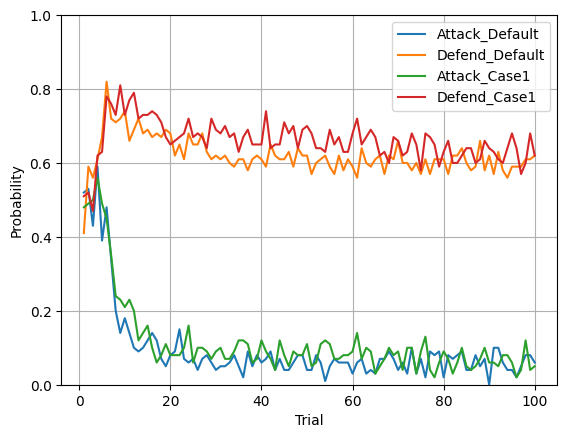

In [33]:
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 100
def reset_attacker(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 3.0

def reset_defender(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 0.05

def run():
    Attacker = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)
    Defender = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)

    a_a = 0
    a_na = 0
    d_d = 0
    d_nd = 0
    
    p_a = [0] * TRIALS
    p_d = [0] * TRIALS
    
    for p in range(PARTICIPANTS):
        total = 0
        reset_agent(Attacker)
        reset_agent(Defender)       
        attribute1 = np.random.choice(['Defend', 'Not-Defend'])
        attribute2 = np.random.choice(['Attack', 'Not-Attack'])
        
        for t in range(TRIALS):
            player1 = Attacker.choose([{'Action':'Attack','attribute1':attribute1},
                                      {'Action':'Not-Attack','attribute1':attribute1}])['Action']
            player2 = Defender.choose([{'Action':'Defend','attribute1':attribute2},
                                      {'Action':'Not-Defend','attribute1':attribute2}])['Action']
            attribute1 = player2
            attribute2 = player1
            payoff1 = payoff2 = 0 
            if player1 == 'Attack' and player2 == 'Defend':
                payoff1 = -5 
                payoff2 = 5
                a_a += 1
                d_d += 1
                p_a[t] += 1
                p_d[t] += 1
            elif player1 == 'Attack' and player2 == 'Not-Defend':
                payoff1 = 10 
                payoff2 = -15
                a_a += 1
                d_nd += 1
                p_a[t] += 1
            elif player1 == 'Not-Attack' and player2 == 'Defend':
                payoff1 = 0 
                payoff2 = -5
                a_na += 1
                d_d += 1
                p_d[t] += 1
            else:
                payoff1 = 0 
                payoff2 = 0
                a_na += 1
                d_nd += 1
                
            Attacker.respond(payoff1)
            Defender.respond(payoff2)
    print('Attacker : Attack, Not-Attack ', a_a / (TRIALS * PARTICIPANTS), a_na / (TRIALS * PARTICIPANTS))  
    print('Defender : Defend, Not-Defend ', d_d / (TRIALS * PARTICIPANTS), d_nd / (TRIALS * PARTICIPANTS))
    
    return [n / PARTICIPANTS for n in p_a], [n / PARTICIPANTS for n in p_d]

if __name__ == '__main__':
    case1_a, case1_d = run()
    plt.plot(range(1, TRIALS + 1), a, label = 'Attack_Default')
    plt.plot(range(1, TRIALS + 1), d, label = 'Defend_Default')
    plt.plot(range(1, TRIALS + 1), case1_a, label = 'Attack_Case1')
    plt.plot(range(1, TRIALS + 1), case1_d, label = 'Defend_Case1')
    plt.ylim([0, 1])
    plt.ylabel("Probability")
    plt.xlabel("Trial")
    plt.grid()
    plt.legend()
    plt.show()

This code is same as the attribute code demonstrated over, but we are introducing two new reset functions to add the decay value. Decay value dictates the memory forget over time. We also plotted the default value of the attcker and the defender, and didn't see much change here.

#Case 2: Attacker’s decay = 0.05 and Defender’s decay = 3.0

Attacker : Attack, Not-Attack  0.1027 0.8973
Defender : Defend, Not-Defend  0.6429 0.3571


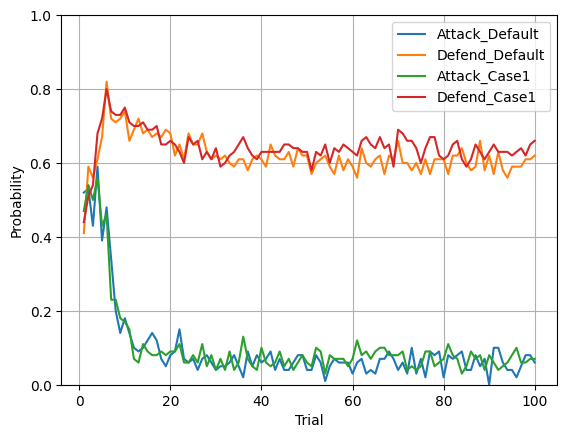

In [34]:
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 100
def reset_attacker(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 0.05

def reset_defender(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 3.00

def run():
    Attacker = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)
    Defender = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)

    a_a = 0
    a_na = 0
    d_d = 0
    d_nd = 0
    
    p_a = [0] * TRIALS
    p_d = [0] * TRIALS
    
    for p in range(PARTICIPANTS):
        total = 0
        reset_agent(Attacker)
        reset_agent(Defender)       
        attribute1 = np.random.choice(['Defend', 'Not-Defend'])
        attribute2 = np.random.choice(['Attack', 'Not-Attack'])
        
        for t in range(TRIALS):
            player1 = Attacker.choose([{'Action':'Attack','attribute1':attribute1},
                                      {'Action':'Not-Attack','attribute1':attribute1}])['Action']
            player2 = Defender.choose([{'Action':'Defend','attribute1':attribute2},
                                      {'Action':'Not-Defend','attribute1':attribute2}])['Action']
            attribute1 = player2
            attribute2 = player1
            payoff1 = payoff2 = 0 
            if player1 == 'Attack' and player2 == 'Defend':
                payoff1 = -5 
                payoff2 = 5
                a_a += 1
                d_d += 1
                p_a[t] += 1
                p_d[t] += 1
            elif player1 == 'Attack' and player2 == 'Not-Defend':
                payoff1 = 10 
                payoff2 = -15
                a_a += 1
                d_nd += 1
                p_a[t] += 1
            elif player1 == 'Not-Attack' and player2 == 'Defend':
                payoff1 = 0 
                payoff2 = -5
                a_na += 1
                d_d += 1
                p_d[t] += 1
            else:
                payoff1 = 0 
                payoff2 = 0
                a_na += 1
                d_nd += 1
                
            Attacker.respond(payoff1)
            Defender.respond(payoff2)
    print('Attacker : Attack, Not-Attack ', a_a / (TRIALS * PARTICIPANTS), a_na / (TRIALS * PARTICIPANTS))  
    print('Defender : Defend, Not-Defend ', d_d / (TRIALS * PARTICIPANTS), d_nd / (TRIALS * PARTICIPANTS))
    
    return [n / PARTICIPANTS for n in p_a], [n / PARTICIPANTS for n in p_d]

if __name__ == '__main__':
    case1_a, case1_d = run()
    plt.plot(range(1, TRIALS + 1), a, label = 'Attack_Default')
    plt.plot(range(1, TRIALS + 1), d, label = 'Defend_Default')
    plt.plot(range(1, TRIALS + 1), case1_a, label = 'Attack_Case1')
    plt.plot(range(1, TRIALS + 1), case1_d, label = 'Defend_Case1')
    plt.ylim([0, 1])
    plt.ylabel("Probability")
    plt.xlabel("Trial")
    plt.grid()
    plt.legend()
    plt.show()

Here we are again changing the decay value from the last code, and the bahavior didn't change that much.

# Case 3: Attacker’s decay = 3.0 and Defender’s decay = 3.0

Attacker : Attack, Not-Attack  0.0919 0.9081
Defender : Defend, Not-Defend  0.7305 0.2695


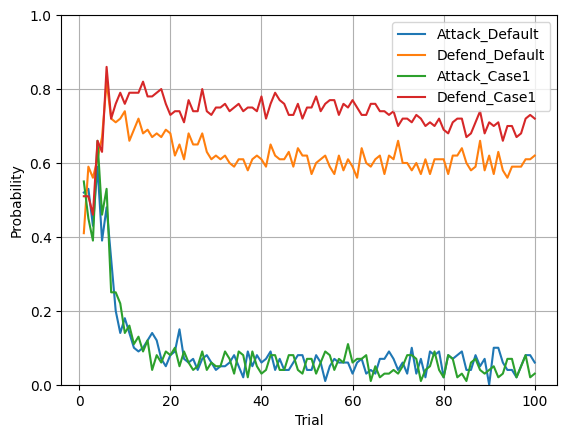

In [35]:
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 100
def reset_attacker(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 0.05

def reset_defender(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 3.00

def run():
    Attacker = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)
    Defender = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)

    a_a = 0
    a_na = 0
    d_d = 0
    d_nd = 0
    
    p_a = [0] * TRIALS
    p_d = [0] * TRIALS
    
    for p in range(PARTICIPANTS):
        total = 0
        reset_agent(Attacker)
        reset_agent(Defender)       
        attribute1 = np.random.choice(['Defend', 'Not-Defend'])
        attribute2 = np.random.choice(['Attack', 'Not-Attack'])
        
        for t in range(TRIALS):
            player1 = Attacker.choose([{'Action':'Attack','attribute1':attribute1},
                                      {'Action':'Not-Attack','attribute1':attribute1}])['Action']
            player2 = Defender.choose([{'Action':'Defend','attribute1':attribute2},
                                      {'Action':'Not-Defend','attribute1':attribute2}])['Action']
            attribute1 = player2
            attribute2 = player1
            payoff1 = payoff2 = 0 
            if player1 == 'Attack' and player2 == 'Defend':
                payoff1 = -5 
                payoff2 = 5
                a_a += 1
                d_d += 1
                p_a[t] += 1
                p_d[t] += 1
            elif player1 == 'Attack' and player2 == 'Not-Defend':
                payoff1 = 10 
                payoff2 = -15
                a_a += 1
                d_nd += 1
                p_a[t] += 1
            elif player1 == 'Not-Attack' and player2 == 'Defend':
                payoff1 = 0 
                payoff2 = -5
                a_na += 1
                d_d += 1
                p_d[t] += 1
            else:
                payoff1 = 0 
                payoff2 = 0
                a_na += 1
                d_nd += 1
                
            Attacker.respond(payoff1)
            Defender.respond(payoff2)
    print('Attacker : Attack, Not-Attack ', a_a / (TRIALS * PARTICIPANTS), a_na / (TRIALS * PARTICIPANTS))  
    print('Defender : Defend, Not-Defend ', d_d / (TRIALS * PARTICIPANTS), d_nd / (TRIALS * PARTICIPANTS))
    
    return [n / PARTICIPANTS for n in p_a], [n / PARTICIPANTS for n in p_d]

if __name__ == '__main__':
    case1_a, case1_d = run()
    plt.plot(range(1, TRIALS + 1), a, label = 'Attack_Default')
    plt.plot(range(1, TRIALS + 1), d, label = 'Defend_Default')
    plt.plot(range(1, TRIALS + 1), case1_a, label = 'Attack_Case1')
    plt.plot(range(1, TRIALS + 1), case1_d, label = 'Defend_Case1')
    plt.ylim([0, 1])
    plt.ylabel("Probability")
    plt.xlabel("Trial")
    plt.grid()
    plt.legend()
    plt.show()

Now, we increased the decay value for both. ALthough the attcker matched the default value, the defender's value was higher during the whole 100 trials.

# Case 4: Attacker’s decay = 0.05 and Defender’s decay = 0.05

Attacker : Attack, Not-Attack  0.0876 0.9124
Defender : Defend, Not-Defend  0.679 0.321


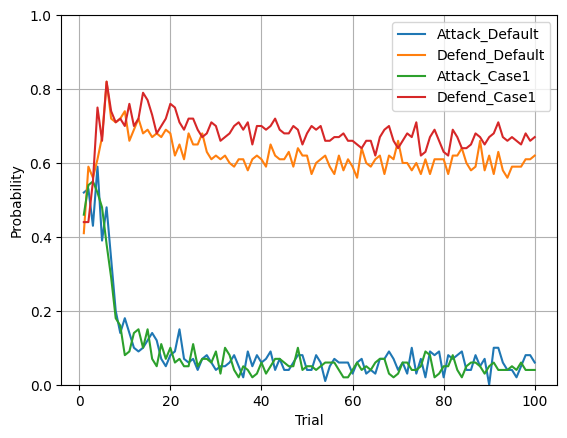

In [36]:
PARTICIPANTS = 100
DECAY = 0.5
NOISE = 0.25
TARGET_COUNT = 2
TRIALS = 100
def reset_attacker(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 0.05

def reset_defender(agent, noise=NOISE, decay=DECAY):
    agent.reset(False)
    agent.noise = noise
    agent.decay = 0.05

def run():
    Attacker = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)
    Defender = pyibl.Agent(["Action", "attribute1"], default_utility= 25, optimized_learning=False)

    a_a = 0
    a_na = 0
    d_d = 0
    d_nd = 0
    
    p_a = [0] * TRIALS
    p_d = [0] * TRIALS
    
    for p in range(PARTICIPANTS):
        total = 0
        reset_agent(Attacker)
        reset_agent(Defender)       
        attribute1 = np.random.choice(['Defend', 'Not-Defend'])
        attribute2 = np.random.choice(['Attack', 'Not-Attack'])
        
        for t in range(TRIALS):
            player1 = Attacker.choose([{'Action':'Attack','attribute1':attribute1},
                                      {'Action':'Not-Attack','attribute1':attribute1}])['Action']
            player2 = Defender.choose([{'Action':'Defend','attribute1':attribute2},
                                      {'Action':'Not-Defend','attribute1':attribute2}])['Action']
            attribute1 = player2
            attribute2 = player1
            payoff1 = payoff2 = 0 
            if player1 == 'Attack' and player2 == 'Defend':
                payoff1 = -5 
                payoff2 = 5
                a_a += 1
                d_d += 1
                p_a[t] += 1
                p_d[t] += 1
            elif player1 == 'Attack' and player2 == 'Not-Defend':
                payoff1 = 10 
                payoff2 = -15
                a_a += 1
                d_nd += 1
                p_a[t] += 1
            elif player1 == 'Not-Attack' and player2 == 'Defend':
                payoff1 = 0 
                payoff2 = -5
                a_na += 1
                d_d += 1
                p_d[t] += 1
            else:
                payoff1 = 0 
                payoff2 = 0
                a_na += 1
                d_nd += 1
                
            Attacker.respond(payoff1)
            Defender.respond(payoff2)
    print('Attacker : Attack, Not-Attack ', a_a / (TRIALS * PARTICIPANTS), a_na / (TRIALS * PARTICIPANTS))  
    print('Defender : Defend, Not-Defend ', d_d / (TRIALS * PARTICIPANTS), d_nd / (TRIALS * PARTICIPANTS))
    
    return [n / PARTICIPANTS for n in p_a], [n / PARTICIPANTS for n in p_d]

if __name__ == '__main__':
    case1_a, case1_d = run()
    plt.plot(range(1, TRIALS + 1), a, label = 'Attack_Default')
    plt.plot(range(1, TRIALS + 1), d, label = 'Defend_Default')
    plt.plot(range(1, TRIALS + 1), case1_a, label = 'Attack_Case1')
    plt.plot(range(1, TRIALS + 1), case1_d, label = 'Defend_Case1')
    plt.ylim([0, 1])
    plt.ylabel("Probability")
    plt.xlabel("Trial")
    plt.grid()
    plt.legend()
    plt.show()

Now, we decreased both attacker and defender's decay value, and the defender seems to behave like case 3, although the value was lower compared to the Case 3. The attacker remians same throughout the whole 100 trials.